# Обучение без учителя. K-means, EM алгоритм 
Настройка числа кластеров в алгоритме K-Means. Elbow и Silhouette метод.

**Цель**: Взять последний датасет по задаче классификации с которым вы работали, убрать целевую переменную и вычислить число кластеров по методу к-средних. проверить и оценить подбор числа кластеров методом локтя

**Источник данных**: https://www.kaggle.com/ronitf/heart-disease-uci

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [72]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [95]:
df =pd.read_csv("datasets/13/heart.csv")

In [97]:
X = df.drop("target", axis=1)
y = df.target

In [94]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

# Оптимальное количество кластеров

## Инертность
Sum of squared distances of samples to their closest cluster center

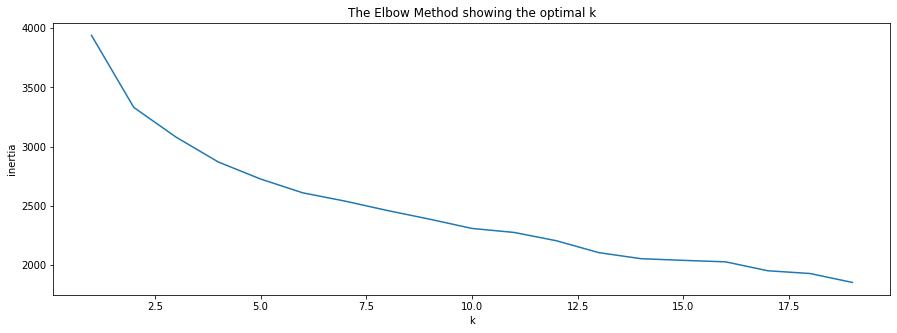

In [82]:
inertia = []
k = range(1, 20)
for k_i in k:
    km = KMeans(n_clusters=k_i).fit(X_scaled)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(15,5))
plt.plot(k, inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Силуэт
The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b).

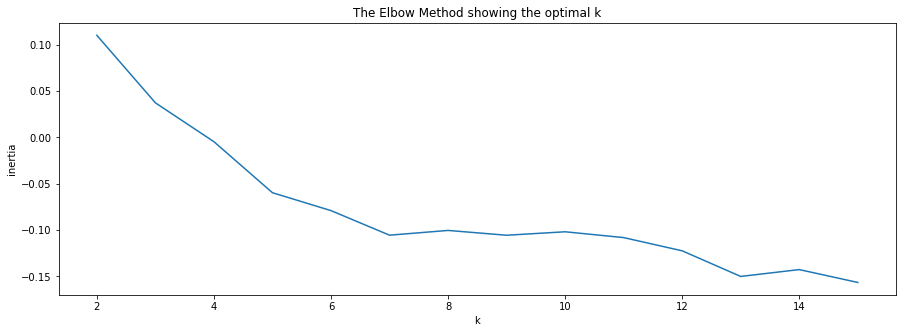

In [83]:
from sklearn.metrics import silhouette_score
silhouette = []
k = range(2, 16)
for k_i in k:
    km = KMeans(n_clusters=k_i).fit(X_scaled)
    km.fit(X_scaled)
    silhouette.append(silhouette_score(X, km.labels_))

plt.figure(figsize=(15,5))
plt.plot(k, silhouette)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Кластеризация
Метрика инертности подтвержает, что количество двух кластеров является оптимальным

In [86]:
X.head()
km = KMeans(n_clusters=2)
km.fit(X_scaled)
df['clusters'] = km.labels_

In [89]:
# Проверяем, как часто совпадают значения колонок target м clusters. 
# Уровень схождения кластеров с разметкой около 19%. Качество кластеризации можно считать удолетворительным

(df.target == df.clusters).value_counts()

False    246
True      57
dtype: int64

# Визуализация

In [44]:
# est = KMeans(n_clusters=3)
# pca = PCA(n_components=3)

# fignum = 1


# X_pca = pca.fit_transform(X)
# X_pca = pd.DataFrame(X_pca, columns=["comp1", "comp2", "comp3"])

# fig = plt.figure(fignum, figsize=(12, 8))
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=150)
# est.fit(X_pca)
# labels = est.labels_

# ax.scatter(X_pca.comp1, X_pca.comp2, X_pca.comp3,
#                c=labels.astype(np.float), edgecolor='k')

# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])
# ax.set_xlabel('comp1')
# ax.set_ylabel('comp2')
# ax.set_zlabel('comp3')
# ax.set_title("3")
# ax.dist = 12
